In [9]:
import torchvision
import  torch
from  torch import  nn,optim,cuda,from_numpy
from torch.utils import  data
from  torchvision import  datasets,transforms
import  torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib import pyplot
import  numpy as np
import  cv2
import os
import sys
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [10]:
device ='cuda' if cuda.is_available() else 'cpu'
print(device)

cuda


In [36]:
transform = transforms.Compose([transforms.Resize((256, 256)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainloader = datasets.ImageFolder('training_set', transform=transform)
testloader = datasets.ImageFolder('test_set', transform=transform)

train_data = torch.utils.data.DataLoader(trainloader, shuffle=True,batch_size=4)
test_data = torch.utils.data.DataLoader(testloader, shuffle=True, batch_size=4)

classes = ('cat', 'dog')

In [42]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3,padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32,kernel_size=3,padding=0,stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
         
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64,kernel_size=3,padding=0,stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        out =self.layer1(x)
        out =self.layer2(out)
        out =self.layer3(out)
        out =out.view(out.size(0),-1)
        out =self.relu(self.fc1(out))
        out =self.fc2(out)
        return out   
    
model = Cnn().to(device)

criterion = nn.CrossEntropyLoss()
optimize = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

def train(epoch):
    model.train()
    for b_i, data_ in enumerate(train_data):
        data_, label = data_[0].to(device), data_[1].to(device)
        optimize.zero_grad()
        predict = model(data_)
        fault = criterion(predict, label)
        fault.backward()
        optimize.step()

        if b_i % 10 == 0:
            print(f"Epoch - {epoch + 1} | Batch - {b_i} {b_i * len(data_)}/{len(train_data.dataset)} \
            | Loss: {fault.item()}")

def test():
    model.eval()
    Fault = 0
    Right = 0
    for img, label in test_data:
        img, label = img.to(device), label.to(device)
        predict = model(img)
        Fault += criterion(predict, label).item()
        result = predict.data.max(1, keepdim=True)[1]
        Right += result.eq(label.data.view_as(result)).cpu().sum()
    Fault /= (len(test_data.dataset))
    print(f"Aniqlik : {Right / len(test_data.dataset)}, Foizda {100.0 * Right / len(test_data.dataset)}%")

for epoch in range(10):
    train(epoch)
    test()


Epoch - 1 | Batch - 0 0/8005             | Loss: 0.6823437213897705
Epoch - 1 | Batch - 10 40/8005             | Loss: 0.6072701215744019
Epoch - 1 | Batch - 20 80/8005             | Loss: 0.6491734981536865
Epoch - 1 | Batch - 30 120/8005             | Loss: 0.593256950378418
Epoch - 1 | Batch - 40 160/8005             | Loss: 0.7293947339057922
Epoch - 1 | Batch - 50 200/8005             | Loss: 0.6875771880149841
Epoch - 1 | Batch - 60 240/8005             | Loss: 0.6363784074783325
Epoch - 1 | Batch - 70 280/8005             | Loss: 0.705460250377655
Epoch - 1 | Batch - 80 320/8005             | Loss: 0.6857081651687622
Epoch - 1 | Batch - 90 360/8005             | Loss: 0.6642565131187439
Epoch - 1 | Batch - 100 400/8005             | Loss: 0.753398060798645
Epoch - 1 | Batch - 110 440/8005             | Loss: 0.578830361366272
Epoch - 1 | Batch - 120 480/8005             | Loss: 0.44789373874664307
Epoch - 1 | Batch - 130 520/8005             | Loss: 0.6567409038543701
Epoch - 1 

Epoch - 1 | Batch - 1130 4520/8005             | Loss: 0.6690876483917236
Epoch - 1 | Batch - 1140 4560/8005             | Loss: 0.5138149857521057
Epoch - 1 | Batch - 1150 4600/8005             | Loss: 0.6058252453804016
Epoch - 1 | Batch - 1160 4640/8005             | Loss: 1.0586615800857544
Epoch - 1 | Batch - 1170 4680/8005             | Loss: 0.6875429749488831
Epoch - 1 | Batch - 1180 4720/8005             | Loss: 0.6584534645080566
Epoch - 1 | Batch - 1190 4760/8005             | Loss: 0.4477232098579407
Epoch - 1 | Batch - 1200 4800/8005             | Loss: 0.7045356035232544
Epoch - 1 | Batch - 1210 4840/8005             | Loss: 0.9158518314361572
Epoch - 1 | Batch - 1220 4880/8005             | Loss: 0.5641305446624756
Epoch - 1 | Batch - 1230 4920/8005             | Loss: 0.31715911626815796
Epoch - 1 | Batch - 1240 4960/8005             | Loss: 0.5948615670204163
Epoch - 1 | Batch - 1250 5000/8005             | Loss: 0.5834799408912659
Epoch - 1 | Batch - 1260 5040/8005   

Epoch - 2 | Batch - 230 920/8005             | Loss: 0.5398691296577454
Epoch - 2 | Batch - 240 960/8005             | Loss: 1.1024682521820068
Epoch - 2 | Batch - 250 1000/8005             | Loss: 1.0453855991363525
Epoch - 2 | Batch - 260 1040/8005             | Loss: 0.3404545187950134
Epoch - 2 | Batch - 270 1080/8005             | Loss: 0.7316545844078064
Epoch - 2 | Batch - 280 1120/8005             | Loss: 0.3578389286994934
Epoch - 2 | Batch - 290 1160/8005             | Loss: 0.5829250812530518
Epoch - 2 | Batch - 300 1200/8005             | Loss: 0.5037631988525391
Epoch - 2 | Batch - 310 1240/8005             | Loss: 0.9525241255760193
Epoch - 2 | Batch - 320 1280/8005             | Loss: 0.6751636266708374
Epoch - 2 | Batch - 330 1320/8005             | Loss: 0.4621177613735199
Epoch - 2 | Batch - 340 1360/8005             | Loss: 0.4050551652908325
Epoch - 2 | Batch - 350 1400/8005             | Loss: 0.6228902339935303
Epoch - 2 | Batch - 360 1440/8005             | Loss:

Epoch - 2 | Batch - 1350 5400/8005             | Loss: 0.5902805924415588
Epoch - 2 | Batch - 1360 5440/8005             | Loss: 0.3795139789581299
Epoch - 2 | Batch - 1370 5480/8005             | Loss: 0.12178818881511688
Epoch - 2 | Batch - 1380 5520/8005             | Loss: 0.8226318359375
Epoch - 2 | Batch - 1390 5560/8005             | Loss: 1.1731762886047363
Epoch - 2 | Batch - 1400 5600/8005             | Loss: 0.5434335470199585
Epoch - 2 | Batch - 1410 5640/8005             | Loss: 0.615731954574585
Epoch - 2 | Batch - 1420 5680/8005             | Loss: 0.24306200444698334
Epoch - 2 | Batch - 1430 5720/8005             | Loss: 0.708935022354126
Epoch - 2 | Batch - 1440 5760/8005             | Loss: 0.6352847814559937
Epoch - 2 | Batch - 1450 5800/8005             | Loss: 0.5948936939239502
Epoch - 2 | Batch - 1460 5840/8005             | Loss: 0.41439858078956604
Epoch - 2 | Batch - 1470 5880/8005             | Loss: 0.538615882396698
Epoch - 2 | Batch - 1480 5920/8005       

Epoch - 3 | Batch - 450 1800/8005             | Loss: 0.6616374850273132
Epoch - 3 | Batch - 460 1840/8005             | Loss: 0.4895590841770172
Epoch - 3 | Batch - 470 1880/8005             | Loss: 0.23571045696735382
Epoch - 3 | Batch - 480 1920/8005             | Loss: 0.3180426061153412
Epoch - 3 | Batch - 490 1960/8005             | Loss: 0.512810230255127
Epoch - 3 | Batch - 500 2000/8005             | Loss: 1.0690076351165771
Epoch - 3 | Batch - 510 2040/8005             | Loss: 0.4891226291656494
Epoch - 3 | Batch - 520 2080/8005             | Loss: 0.5707044005393982
Epoch - 3 | Batch - 530 2120/8005             | Loss: 0.2977157235145569
Epoch - 3 | Batch - 540 2160/8005             | Loss: 0.39335280656814575
Epoch - 3 | Batch - 550 2200/8005             | Loss: 0.367830753326416
Epoch - 3 | Batch - 560 2240/8005             | Loss: 0.4065280556678772
Epoch - 3 | Batch - 570 2280/8005             | Loss: 0.323822557926178
Epoch - 3 | Batch - 580 2320/8005             | Loss

Epoch - 3 | Batch - 1570 6280/8005             | Loss: 0.18505892157554626
Epoch - 3 | Batch - 1580 6320/8005             | Loss: 0.37218722701072693
Epoch - 3 | Batch - 1590 6360/8005             | Loss: 0.29202884435653687
Epoch - 3 | Batch - 1600 6400/8005             | Loss: 0.8568634986877441
Epoch - 3 | Batch - 1610 6440/8005             | Loss: 0.4086374342441559
Epoch - 3 | Batch - 1620 6480/8005             | Loss: 0.6773389577865601
Epoch - 3 | Batch - 1630 6520/8005             | Loss: 0.2542630732059479
Epoch - 3 | Batch - 1640 6560/8005             | Loss: 0.743441104888916
Epoch - 3 | Batch - 1650 6600/8005             | Loss: 0.4866008460521698
Epoch - 3 | Batch - 1660 6640/8005             | Loss: 0.520474910736084
Epoch - 3 | Batch - 1670 6680/8005             | Loss: 0.6200783848762512
Epoch - 3 | Batch - 1680 6720/8005             | Loss: 0.4659023582935333
Epoch - 3 | Batch - 1690 6760/8005             | Loss: 0.30200740694999695
Epoch - 3 | Batch - 1700 6800/8005  

Epoch - 4 | Batch - 680 2720/8005             | Loss: 0.7769446969032288
Epoch - 4 | Batch - 690 2760/8005             | Loss: 0.6242743134498596
Epoch - 4 | Batch - 700 2800/8005             | Loss: 0.21168066561222076
Epoch - 4 | Batch - 710 2840/8005             | Loss: 0.7100728750228882
Epoch - 4 | Batch - 720 2880/8005             | Loss: 0.4833090603351593
Epoch - 4 | Batch - 730 2920/8005             | Loss: 0.3498844504356384
Epoch - 4 | Batch - 740 2960/8005             | Loss: 0.29555603861808777
Epoch - 4 | Batch - 750 3000/8005             | Loss: 0.2677612006664276
Epoch - 4 | Batch - 760 3040/8005             | Loss: 0.3455517590045929
Epoch - 4 | Batch - 770 3080/8005             | Loss: 0.24786531925201416
Epoch - 4 | Batch - 780 3120/8005             | Loss: 0.9693410396575928
Epoch - 4 | Batch - 790 3160/8005             | Loss: 0.07358912378549576
Epoch - 4 | Batch - 800 3200/8005             | Loss: 1.8358820676803589
Epoch - 4 | Batch - 810 3240/8005             |

Epoch - 4 | Batch - 1790 7160/8005             | Loss: 0.3911624252796173
Epoch - 4 | Batch - 1800 7200/8005             | Loss: 0.5583556294441223
Epoch - 4 | Batch - 1810 7240/8005             | Loss: 0.8299214839935303
Epoch - 4 | Batch - 1820 7280/8005             | Loss: 0.8011417388916016
Epoch - 4 | Batch - 1830 7320/8005             | Loss: 0.3684927821159363
Epoch - 4 | Batch - 1840 7360/8005             | Loss: 0.5599889755249023
Epoch - 4 | Batch - 1850 7400/8005             | Loss: 0.19542525708675385
Epoch - 4 | Batch - 1860 7440/8005             | Loss: 0.9656813144683838
Epoch - 4 | Batch - 1870 7480/8005             | Loss: 0.6507691740989685
Epoch - 4 | Batch - 1880 7520/8005             | Loss: 0.909466028213501
Epoch - 4 | Batch - 1890 7560/8005             | Loss: 0.11697818338871002
Epoch - 4 | Batch - 1900 7600/8005             | Loss: 0.5675244927406311
Epoch - 4 | Batch - 1910 7640/8005             | Loss: 1.4497205018997192
Epoch - 4 | Batch - 1920 7680/8005   

Epoch - 5 | Batch - 900 3600/8005             | Loss: 0.46356284618377686
Epoch - 5 | Batch - 910 3640/8005             | Loss: 0.31582915782928467
Epoch - 5 | Batch - 920 3680/8005             | Loss: 0.45030832290649414
Epoch - 5 | Batch - 930 3720/8005             | Loss: 1.5484225749969482
Epoch - 5 | Batch - 940 3760/8005             | Loss: 0.48756417632102966
Epoch - 5 | Batch - 950 3800/8005             | Loss: 0.6811343431472778
Epoch - 5 | Batch - 960 3840/8005             | Loss: 0.49551111459732056
Epoch - 5 | Batch - 970 3880/8005             | Loss: 0.5223979353904724
Epoch - 5 | Batch - 980 3920/8005             | Loss: 0.14532716572284698
Epoch - 5 | Batch - 990 3960/8005             | Loss: 0.8467777371406555
Epoch - 5 | Batch - 1000 4000/8005             | Loss: 0.5513205528259277
Epoch - 5 | Batch - 1010 4040/8005             | Loss: 0.2994897961616516
Epoch - 5 | Batch - 1020 4080/8005             | Loss: 0.23428668081760406
Epoch - 5 | Batch - 1030 4120/8005       

Aniqlik : 0.7676717638969421, Foizda 76.76717376708984%
Epoch - 6 | Batch - 0 0/8005             | Loss: 0.20818091928958893
Epoch - 6 | Batch - 10 40/8005             | Loss: 0.3788711130619049
Epoch - 6 | Batch - 20 80/8005             | Loss: 0.185990571975708
Epoch - 6 | Batch - 30 120/8005             | Loss: 1.1391116380691528
Epoch - 6 | Batch - 40 160/8005             | Loss: 0.5434385538101196
Epoch - 6 | Batch - 50 200/8005             | Loss: 0.35692518949508667
Epoch - 6 | Batch - 60 240/8005             | Loss: 0.34412434697151184
Epoch - 6 | Batch - 70 280/8005             | Loss: 0.6027868390083313
Epoch - 6 | Batch - 80 320/8005             | Loss: 0.5586437582969666
Epoch - 6 | Batch - 90 360/8005             | Loss: 0.7197432518005371
Epoch - 6 | Batch - 100 400/8005             | Loss: 0.2490973174571991
Epoch - 6 | Batch - 110 440/8005             | Loss: 0.18029728531837463
Epoch - 6 | Batch - 120 480/8005             | Loss: 0.6067517399787903
Epoch - 6 | Batch - 

Epoch - 6 | Batch - 1120 4480/8005             | Loss: 0.23745259642601013
Epoch - 6 | Batch - 1130 4520/8005             | Loss: 0.3721400201320648
Epoch - 6 | Batch - 1140 4560/8005             | Loss: 0.45634907484054565
Epoch - 6 | Batch - 1150 4600/8005             | Loss: 0.08908508718013763
Epoch - 6 | Batch - 1160 4640/8005             | Loss: 0.5986284613609314
Epoch - 6 | Batch - 1170 4680/8005             | Loss: 0.09457507729530334
Epoch - 6 | Batch - 1180 4720/8005             | Loss: 0.37001532316207886
Epoch - 6 | Batch - 1190 4760/8005             | Loss: 0.10695640742778778
Epoch - 6 | Batch - 1200 4800/8005             | Loss: 0.3763658404350281
Epoch - 6 | Batch - 1210 4840/8005             | Loss: 0.7523190379142761
Epoch - 6 | Batch - 1220 4880/8005             | Loss: 0.19543805718421936
Epoch - 6 | Batch - 1230 4920/8005             | Loss: 0.12302809953689575
Epoch - 6 | Batch - 1240 4960/8005             | Loss: 0.24672022461891174
Epoch - 6 | Batch - 1250 5000

Epoch - 7 | Batch - 220 880/8005             | Loss: 0.08671430498361588
Epoch - 7 | Batch - 230 920/8005             | Loss: 0.1640220433473587
Epoch - 7 | Batch - 240 960/8005             | Loss: 0.020608630031347275
Epoch - 7 | Batch - 250 1000/8005             | Loss: 0.8071101903915405
Epoch - 7 | Batch - 260 1040/8005             | Loss: 0.2695872485637665
Epoch - 7 | Batch - 270 1080/8005             | Loss: 0.9995167255401611
Epoch - 7 | Batch - 280 1120/8005             | Loss: 0.4441186785697937
Epoch - 7 | Batch - 290 1160/8005             | Loss: 0.3753353953361511
Epoch - 7 | Batch - 300 1200/8005             | Loss: 0.11728113889694214
Epoch - 7 | Batch - 310 1240/8005             | Loss: 0.13395832479000092
Epoch - 7 | Batch - 320 1280/8005             | Loss: 0.06259505450725555
Epoch - 7 | Batch - 330 1320/8005             | Loss: 0.127407506108284
Epoch - 7 | Batch - 340 1360/8005             | Loss: 0.19499081373214722
Epoch - 7 | Batch - 350 1400/8005             | 

Epoch - 7 | Batch - 1340 5360/8005             | Loss: 0.3921626806259155
Epoch - 7 | Batch - 1350 5400/8005             | Loss: 0.33032917976379395
Epoch - 7 | Batch - 1360 5440/8005             | Loss: 0.16875119507312775
Epoch - 7 | Batch - 1370 5480/8005             | Loss: 0.9981592297554016
Epoch - 7 | Batch - 1380 5520/8005             | Loss: 0.31021827459335327
Epoch - 7 | Batch - 1390 5560/8005             | Loss: 0.6185920238494873
Epoch - 7 | Batch - 1400 5600/8005             | Loss: 0.43649277091026306
Epoch - 7 | Batch - 1410 5640/8005             | Loss: 0.898193359375
Epoch - 7 | Batch - 1420 5680/8005             | Loss: 0.20313647389411926
Epoch - 7 | Batch - 1430 5720/8005             | Loss: 0.6570084095001221
Epoch - 7 | Batch - 1440 5760/8005             | Loss: 0.09667009860277176
Epoch - 7 | Batch - 1450 5800/8005             | Loss: 0.2557619512081146
Epoch - 7 | Batch - 1460 5840/8005             | Loss: 0.19064463675022125
Epoch - 7 | Batch - 1470 5880/8005 

Epoch - 8 | Batch - 440 1760/8005             | Loss: 0.47617822885513306
Epoch - 8 | Batch - 450 1800/8005             | Loss: 1.0728157758712769
Epoch - 8 | Batch - 460 1840/8005             | Loss: 1.4523701667785645
Epoch - 8 | Batch - 470 1880/8005             | Loss: 0.12730669975280762
Epoch - 8 | Batch - 480 1920/8005             | Loss: 0.9627572298049927
Epoch - 8 | Batch - 490 1960/8005             | Loss: 0.3047123849391937
Epoch - 8 | Batch - 500 2000/8005             | Loss: 0.37420380115509033
Epoch - 8 | Batch - 510 2040/8005             | Loss: 0.4940320551395416
Epoch - 8 | Batch - 520 2080/8005             | Loss: 0.32861030101776123
Epoch - 8 | Batch - 530 2120/8005             | Loss: 0.6795234680175781
Epoch - 8 | Batch - 540 2160/8005             | Loss: 0.1537657529115677
Epoch - 8 | Batch - 550 2200/8005             | Loss: 0.4775519371032715
Epoch - 8 | Batch - 560 2240/8005             | Loss: 0.2265343964099884
Epoch - 8 | Batch - 570 2280/8005             |

Epoch - 8 | Batch - 1550 6200/8005             | Loss: 0.1892063468694687
Epoch - 8 | Batch - 1560 6240/8005             | Loss: 0.5359766483306885
Epoch - 8 | Batch - 1570 6280/8005             | Loss: 0.8688704967498779
Epoch - 8 | Batch - 1580 6320/8005             | Loss: 0.6705819368362427
Epoch - 8 | Batch - 1590 6360/8005             | Loss: 0.2364557832479477
Epoch - 8 | Batch - 1600 6400/8005             | Loss: 0.06289612501859665
Epoch - 8 | Batch - 1610 6440/8005             | Loss: 0.5567490458488464
Epoch - 8 | Batch - 1620 6480/8005             | Loss: 0.5170564651489258
Epoch - 8 | Batch - 1630 6520/8005             | Loss: 0.4891197681427002
Epoch - 8 | Batch - 1640 6560/8005             | Loss: 0.0924491286277771
Epoch - 8 | Batch - 1650 6600/8005             | Loss: 0.5896977782249451
Epoch - 8 | Batch - 1660 6640/8005             | Loss: 0.9245800375938416
Epoch - 8 | Batch - 1670 6680/8005             | Loss: 0.06297574192285538
Epoch - 8 | Batch - 1680 6720/8005  

Epoch - 9 | Batch - 650 2600/8005             | Loss: 0.16128765046596527
Epoch - 9 | Batch - 660 2640/8005             | Loss: 0.25066280364990234
Epoch - 9 | Batch - 670 2680/8005             | Loss: 0.29880720376968384
Epoch - 9 | Batch - 680 2720/8005             | Loss: 0.34371328353881836
Epoch - 9 | Batch - 690 2760/8005             | Loss: 0.9910208582878113
Epoch - 9 | Batch - 700 2800/8005             | Loss: 0.3117534816265106
Epoch - 9 | Batch - 710 2840/8005             | Loss: 1.5959829092025757
Epoch - 9 | Batch - 720 2880/8005             | Loss: 0.8681700825691223
Epoch - 9 | Batch - 730 2920/8005             | Loss: 0.43768081068992615
Epoch - 9 | Batch - 740 2960/8005             | Loss: 0.014526017010211945
Epoch - 9 | Batch - 750 3000/8005             | Loss: 0.4928570091724396
Epoch - 9 | Batch - 760 3040/8005             | Loss: 0.4467008113861084
Epoch - 9 | Batch - 770 3080/8005             | Loss: 0.15099292993545532
Epoch - 9 | Batch - 780 3120/8005          

Epoch - 9 | Batch - 1760 7040/8005             | Loss: 0.6086883544921875
Epoch - 9 | Batch - 1770 7080/8005             | Loss: 0.314502477645874
Epoch - 9 | Batch - 1780 7120/8005             | Loss: 0.03771581873297691
Epoch - 9 | Batch - 1790 7160/8005             | Loss: 0.5305072665214539
Epoch - 9 | Batch - 1800 7200/8005             | Loss: 0.565524697303772
Epoch - 9 | Batch - 1810 7240/8005             | Loss: 0.3496173024177551
Epoch - 9 | Batch - 1820 7280/8005             | Loss: 0.2759617567062378
Epoch - 9 | Batch - 1830 7320/8005             | Loss: 0.4343644678592682
Epoch - 9 | Batch - 1840 7360/8005             | Loss: 0.23251661658287048
Epoch - 9 | Batch - 1850 7400/8005             | Loss: 0.3704754114151001
Epoch - 9 | Batch - 1860 7440/8005             | Loss: 0.6629278659820557
Epoch - 9 | Batch - 1870 7480/8005             | Loss: 0.07604757696390152
Epoch - 9 | Batch - 1880 7520/8005             | Loss: 0.3438657224178314
Epoch - 9 | Batch - 1890 7560/8005   

Epoch - 10 | Batch - 850 3400/8005             | Loss: 0.04660481587052345
Epoch - 10 | Batch - 860 3440/8005             | Loss: 0.01776181533932686
Epoch - 10 | Batch - 870 3480/8005             | Loss: 0.15709754824638367
Epoch - 10 | Batch - 880 3520/8005             | Loss: 0.07932040840387344
Epoch - 10 | Batch - 890 3560/8005             | Loss: 0.323822021484375
Epoch - 10 | Batch - 900 3600/8005             | Loss: 0.12857605516910553
Epoch - 10 | Batch - 910 3640/8005             | Loss: 0.1394871175289154
Epoch - 10 | Batch - 920 3680/8005             | Loss: 0.031006332486867905
Epoch - 10 | Batch - 930 3720/8005             | Loss: 0.1527998000383377
Epoch - 10 | Batch - 940 3760/8005             | Loss: 0.26230740547180176
Epoch - 10 | Batch - 950 3800/8005             | Loss: 0.6702841520309448
Epoch - 10 | Batch - 960 3840/8005             | Loss: 0.04885884374380112
Epoch - 10 | Batch - 970 3880/8005             | Loss: 0.4064176380634308
Epoch - 10 | Batch - 980 3920/

Epoch - 10 | Batch - 1940 7760/8005             | Loss: 0.5559060573577881
Epoch - 10 | Batch - 1950 7800/8005             | Loss: 0.3282398581504822
Epoch - 10 | Batch - 1960 7840/8005             | Loss: 1.101585030555725
Epoch - 10 | Batch - 1970 7880/8005             | Loss: 0.25677329301834106
Epoch - 10 | Batch - 1980 7920/8005             | Loss: 0.3232031762599945
Epoch - 10 | Batch - 1990 7960/8005             | Loss: 0.10484585165977478
Epoch - 10 | Batch - 2000 8000/8005             | Loss: 0.3182145059108734
Aniqlik : 0.7701433300971985, Foizda 77.01433563232422%


In [43]:
torch.save(model.state_dict(),"Dog_Cat.h5")

In [44]:
model.load_state_dict(torch.load('Dog_Cat.h5'))
model.eval()

Cnn(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
  (re

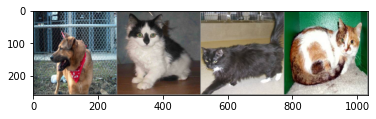

  dog   cat   cat   cat


In [46]:
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_data)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))